# Box Plots: An Overview

Box plots, also known as box-and-whisker plots, are graphical representations used to display the distribution of a dataset. They summarize data using five key statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Box plots also identify potential outliers.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1920px-Boxplot_vs_PDF.svg.png"width="400px"></center>

## Utility:
1. **Summary Statistics**: Box plots provide a concise summary of the data's central tendency, dispersion, and skewness.
2. **Outlier Detection**: They are effective in identifying outliers within the data.
3. **Comparative Analysis**: Box plots can compare distributions across multiple groups or categories.
4. **Visualizing Spread and Symmetry**: They offer insights into the spread and symmetry of the data distribution.

## When to Use Box Plots:
1. **Comparing Distributions**: When comparing the distribution of multiple datasets or groups.
2. **Identifying Outliers**: To detect and highlight outliers in the data.
3. **Understanding Data Spread**: When you need to visualize the spread and central tendency of the data.
4. **Exploring Skewness**: To assess the skewness of the data distribution.

## Pitfalls of Using Box Plots:
1. **Misleading with Small Samples**: Box plots can be misleading with very small sample sizes.
2. **Overlapping Boxes**: When comparing many groups, boxes may overlap, making interpretation difficult.
3. **Lack of Detail**: They do not show the underlying distribution or the number of data points.
4. **Interpretation of Whiskers**: The meaning of the whiskers can be misunderstood if not clearly defined (e.g., whether they represent the range, 1.5*IQR, etc.).
5. **Complexity for Non-Statisticians**: Box plots may be difficult to interpret for audiences not familiar with statistical summaries.

## Mitigation Strategies:
1. **Annotate Sample Sizes**: Clearly annotate the sample sizes for each box plot to provide context.
2. **Adjust Whisker Definition**: Define whiskers consistently and explain their meaning in the plot legend or caption.
3. **Reduce Overlap**: Use jittering or small multiples to reduce overlap when comparing many groups.
4. **Complement with Other Plots**: Complement box plots with additional plots (e.g., histograms, dot plots) to provide more detail about the data distribution.
5. **Simplify for Audience**: Ensure explanations and interpretations are clear, especially for non-statistical audiences. Use visual aids and legends to enhance understanding.
6. **Color Coding**: Use color coding or patterns to differentiate between groups and improve readability.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df = pd.read_csv(data,index_col='data',parse_dates=True)
df.rename(columns={'temperatura-mininima':'temperatura-minima'},inplace=True)
df

,casos-confirmados,chuva,temperatura-media,temperatura-minima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9
...,...,...,...,...,...
2014-08-01,55,12.2,20.6,13.1,24.7
2014-09-01,40,69.2,23.0,18.6,26.8
2014-10-01,40,15.6,24.7,17.2,30.0


[Text(0.5, 1.0, 'Temperaturas entre 1998 e 2014'),
 Text(0.5, 0, 'Temperatura em Cº')]

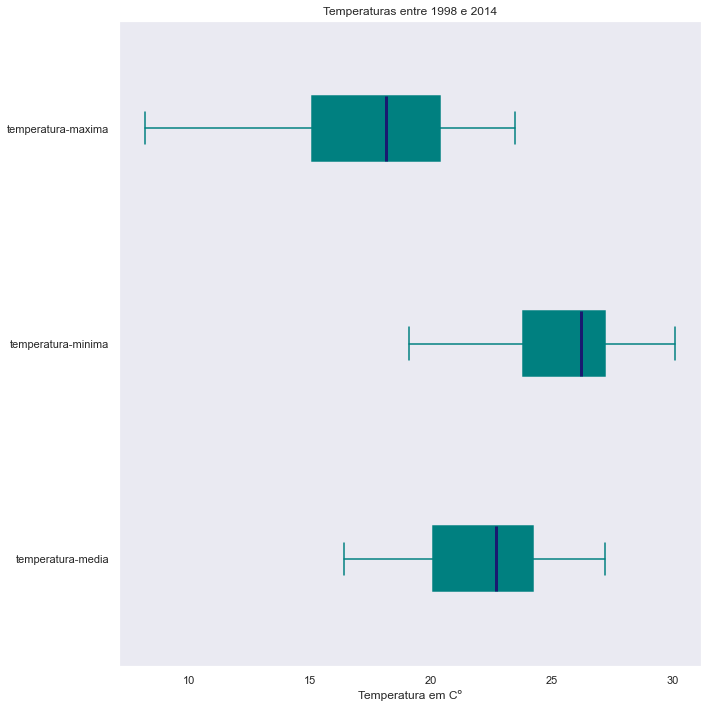

In [223]:
fig,ax = plt.subplots(figsize=(10,10),
                      dpi=72)

fig.set(tight_layout=True)

col_names = df.columns[[2,3,4]]

ax.boxplot((df['temperatura-media'],df['temperatura-maxima'],df['temperatura-minima']),
           vert=False,
           labels=col_names,
           patch_artist=True,
           boxprops={
               "facecolor":"teal",
               "color":"teal",
               "linewidth":1.5
           },
           medianprops={
               "color":"midnightblue",
               "linewidth":3 
           },
           whiskerprops={
               "color":"teal",
               "linewidth":1.5
           },
           capprops={
                "color":"teal",
               "linewidth":1.5
           }
           );

ax.set(title="Temperaturas entre 1998 e 2014",
       xlabel="Temperatura em Cº")

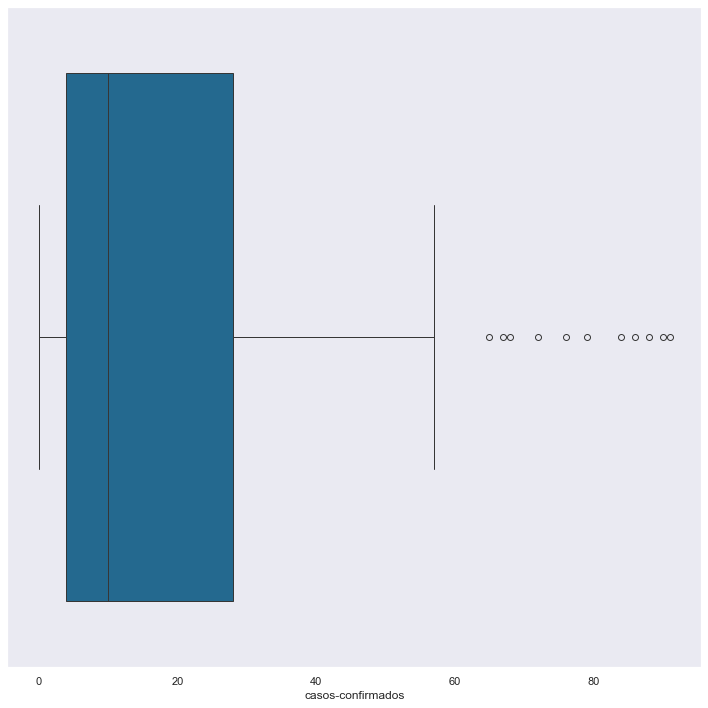

In [224]:
fig1,ax1 = plt.subplots(figsize=(10,10),
                        dpi=72)

fig1.set(tight_layout=True);

outliers_casos_confirmados = (df['casos-confirmados'].quantile(0.75)-df['casos-confirmados'].quantile(0.25))*1.5

casos = df.loc[df['casos-confirmados'] < outliers_casos_confirmados]

sns.set_theme(style='dark',
              palette='colorblind')

ax1 = sns.boxplot(x=casos['casos-confirmados'],
                  saturation=0.6,
                  data=casos
                  );

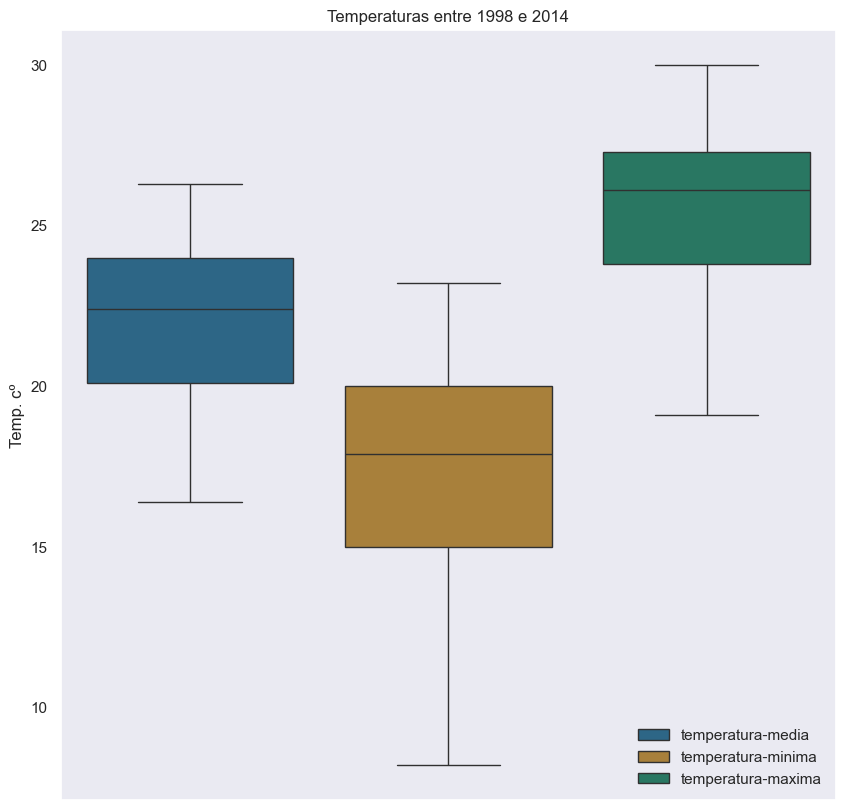

In [225]:
fig2,ax2 = plt.subplots(figsize=(10,10))

fig.set(tight_layout=True)

ax2 = sns.boxplot(data=casos[['temperatura-media','temperatura-minima','temperatura-maxima']],
                  saturation=0.5,
                  ax=ax2,
                  legend="full",
                  );

ax2.set(title="Temperaturas entre 1998 e 2014",
        ylabel="Temp. cº");

ax2.xaxis.set_visible(False);
ax2.legend(frameon=False,
           loc='lower right'
           );